In [1]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import random

In [2]:
def build_model(my_learning_rate):
  model=tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))
  model.compile(optimizer=tf.optimizers.experimental.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])
  return model

In [3]:
def train_model(model,feature,label,epochs,batch_size):
  history=model.fit(x=feature,
                    y=label,
                    batch_size=batch_size,
                    epochs=epochs)
  tr_weights=model.get_weights()[0]
  tr_bias=model.get_weights()[1]
  epochs=history.epoch
  pd_hist=pd.DataFrame(history.history)
  rmse=pd_hist["root_mean_squared_error"]
  return tr_weights, tr_bias, epochs, rmse

In [4]:
def plot_model(tr_weights, tr_bias, feature, label):
  plt.xlabel("feature")
  plt.ylabel("label")
  plt.scatter(feature,label)
  x0=0
  y0=tr_bias
  x1=feature[-1]
  y1=tr_bias+(tr_weights*x1)
  plt.plot([x0,x1],[y0,y1],'r')
  plt.show()

In [5]:
def plot_loss(epochs,rmse):
  plt.figure()
  plt.xlabel("epoch")
  plt.ylabel("RMSE")
  plt.plot(epochs,rmse,label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97,rmse.max()])
  plt.show()

In [6]:
test_features=([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0])
test_label=([5.0,8.9,9.6,14.2,18.7,19.5,21.3,28.9,32.0,33.9])


Epoch 1/80
1/1 [==============================] - 0s 285ms/step - loss: 1007.4280 - root_mean_squared_error: 31.7400
Epoch 2/80
1/1 [==============================] - 0s 13ms/step - loss: 818.0252 - root_mean_squared_error: 28.6011
Epoch 3/80
1/1 [==============================] - 0s 15ms/step - loss: 699.1249 - root_mean_squared_error: 26.4410
Epoch 4/80
1/1 [==============================] - 0s 11ms/step - loss: 609.8046 - root_mean_squared_error: 24.6942
Epoch 5/80
1/1 [==============================] - 0s 14ms/step - loss: 537.6653 - root_mean_squared_error: 23.1876
Epoch 6/80
1/1 [==============================] - 0s 11ms/step - loss: 477.0798 - root_mean_squared_error: 21.8422
Epoch 7/80
1/1 [==============================] - 0s 12ms/step - loss: 424.9540 - root_mean_squared_error: 20.6144
Epoch 8/80
1/1 [==============================] - 0s 13ms/step - loss: 379.3796 - root_mean_squared_error: 19.4777
Epoch 9/80
1/1 [==============================] - 0s 11ms/step - loss: 339.084

/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


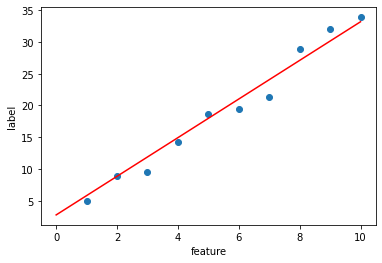

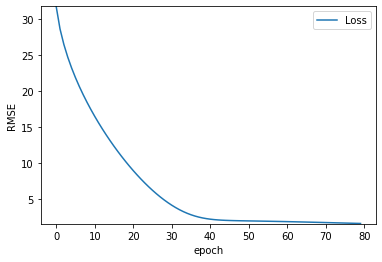

In [8]:
learning_rate=0.14;
epochs=80
batch_size=10
new_model=build_model(learning_rate)
[tr_weights, tr_bias, epochs, rmse]=train_model(new_model,test_features,test_label,epochs,batch_size)
plot_model(tr_weights, tr_bias, test_features, test_label)
plot_loss(epochs,rmse)

In [9]:
def build_model(my_learning_rate):
  model=tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(units=3, input_shape=(2,)))
  model.add(tf.keras.layers.Dense(units=3, activation=tf.keras.activations.softmax))
  model.compile(optimizer=tf.optimizers.experimental.RMSprop(learning_rate=my_learning_rate),
                loss=tf.keras.losses.CategoricalCrossentropy(),
                metrics=[tf.keras.metrics.CategoricalAccuracy()])
  return model

In [10]:
def train_model(model,feature,label,epochs,batch_size):
  history=model.fit(x=feature,
                    y=label,
                    batch_size=batch_size,
                    epochs=epochs)
  tr_weights=model.get_weights()[0]
  tr_bias=model.get_weights()[1]
  epochs=history.epoch
  pd_hist=pd.DataFrame(history.history)
  cce=pd_hist["categorical_accuracy"]
  return tr_weights, tr_bias, epochs, cce

In [11]:
mas_len=60
X=np.array([])
Y=np.array([])
X=np.append(X,np.array([(random.random()-1/2)*2 for i in range(mas_len)]))
X=np.append(X,np.array([1+(random.random()-1/2)*2 for i in range(mas_len)]))
X=np.append(X,np.array([-1+(random.random()-1/2)*2 for i in range(mas_len)]))

Y=np.append(Y,np.array([2+(random.random()-1/2)*2 for i in range(mas_len)]))
Y=np.append(Y,np.array([(random.random()-1/2)*2 for i in range(mas_len)]))
Y=np.append(Y,np.array([(random.random()-1/2)*2 for i in range(mas_len)]))

C=np.zeros(mas_len*3)
for i in range(mas_len*3):
  C[i]=np.fix(i/mas_len)

label=np.zeros([3,mas_len*3])
for i in range(mas_len*3):
  label[int(C[i]),i]=1

train_label=label.transpose()
train_features=np.zeros([mas_len*3,2])
for i in range(mas_len*3):
  train_features[i,0]=X[i]
  train_features[i,1]=X[i]


test_size=40
X_t=np.array([])
Y_t=np.array([])
X_t=np.append(X_t,np.array([(random.random()-1/2)*6 for i in range(test_size)]))
Y_t=np.append(Y_t,np.array([(random.random()-1/2)*6 for i in range(test_size)]))

test_features=np.zeros([test_size,2])
for i in range(test_size):
  test_features[i,0]=X_t[i]
  test_features[i,1]=X_t[i]

In [12]:
from tensorflow.python.ops.gen_logging_ops import Print
learning_rate=0.14;
epochs=40
batch_size=20
new_model=build_model(learning_rate)
[tr_weights, tr_bias, epochs, rmse]=train_model(new_model,train_features,train_label,epochs,batch_size)


Epoch 1/40
9/9 [==============================] - 0s 3ms/step - loss: 0.7842 - categorical_accuracy: 0.6667
Epoch 2/40
9/9 [==============================] - 0s 2ms/step - loss: 0.6148 - categorical_accuracy: 0.6667
Epoch 3/40
9/9 [==============================] - 0s 2ms/step - loss: 0.6303 - categorical_accuracy: 0.6778
Epoch 4/40
9/9 [==============================] - 0s 2ms/step - loss: 0.6237 - categorical_accuracy: 0.6778
Epoch 5/40
9/9 [==============================] - 0s 2ms/step - loss: 0.6648 - categorical_accuracy: 0.6722
Epoch 6/40
9/9 [==============================] - 0s 2ms/step - loss: 0.5792 - categorical_accuracy: 0.7000
Epoch 7/40
9/9 [==============================] - 0s 2ms/step - loss: 0.6517 - categorical_accuracy: 0.6500
Epoch 8/40
9/9 [==============================] - 0s 3ms/step - loss: 0.6416 - categorical_accuracy: 0.6444
Epoch 9/40
9/9 [==============================] - 0s 2ms/step - loss: 0.6521 - categorical_accuracy: 0.6111
Epoch 10/40
9/9 [===========

In [13]:
p_test=new_model.predict(test_features)

c_test=np.zeros(len(p_test))

for i in range(len(p_test)):
  if((p_test[i,0]>p_test[i,1])&(p_test[i,0]>p_test[i,2])):
    c_test[i]=0
  if((p_test[i,1]>p_test[i,0])&(p_test[i,1]>p_test[i,2])):
    c_test[i]=1
  if((p_test[i,2]>p_test[i,1])&(p_test[i,2]>p_test[i,0])):
    c_test[i]=2

2/2 [==============================] - 0s 4ms/step


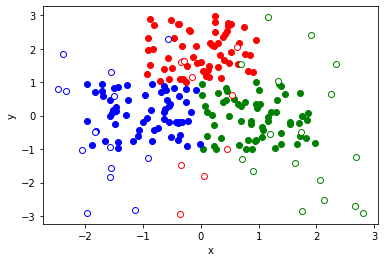

In [14]:
plt.figure()
plt.xlabel("x")
plt.ylabel("y")
for i in range(mas_len*3):
  if(C[i]==0):
    plt.scatter(X[i],Y[i],c='r')
  elif(C[i]==1):
    plt.scatter(X[i],Y[i],c='g')
  elif(C[i]==2):
    plt.scatter(X[i],Y[i],c='b')

for i in range(test_size):
  if(c_test[i]==0):
    plt.scatter(X_t[i],Y_t[i],c='w',edgecolors='r')
  elif(c_test[i]==1):
    plt.scatter(X_t[i],Y_t[i],c='w',edgecolors='g')
  elif(c_test[i]==2):
    plt.scatter(X_t[i],Y_t[i],c='w',edgecolors='b')

plt.show()